# Regression(Boston data with Scaler)

[document](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)

In [1]:
import pandas as pd
import numpy as np

# To show the numeric type well
np.set_printoptions(suppress=True)

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

my_predictions = {}

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(12, 9))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def mse_eval(name_, pred, actual):
    global predictions
    global colors

    plot_predictions(name_, pred, actual)

    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df)
    
    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['mse'])
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')
        
    plt.title('MSE Error', fontsize=18)
    plt.xlim(min_, max_)
    
    plt.show()

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

In [27]:
def plot_coef(columns, coef):
    coef_df = pd.DataFrame(list(zip(columns, coef)))
    coef_df.columns=['feature', 'coef']
    coef_df = coef_df.sort_values('coef', ascending=False).reset_index(drop=True)
    
    fig, ax = plt.subplots(figsize=(9, 7))
    ax.barh(np.arange(len(coef_df)), coef_df['coef'])
    idx = np.arange(len(coef_df))
    ax.set_yticks(idx)
    ax.set_yticklabels(coef_df['feature'])
    fig.tight_layout()
    plt.show()

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
from sklearn.datasets import load_boston

In [3]:
data = load_boston()

In [4]:
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
df = pd.DataFrame(data['data'], columns = data['feature_names'])

In [6]:
df['MEDV'] = data['target']

In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('MEDV', 1), df['MEDV'])

In [10]:
x_train.shape, x_test.shape

((379, 13), (127, 13))

## Scaler

In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [12]:
x_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,3.745617,10.775726,11.294565,0.065963,0.558496,6.286087,69.150923,3.699245,9.519789,409.316623,18.364116,357.322665,12.538311
std,8.941671,22.553489,6.923205,0.248546,0.116620,0.743505,28.311414,2.055719,8.669505,167.907666,2.227398,89.249119,7.293739
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,2.520000,1.730000
25%,0.083390,0.000000,5.190000,0.000000,0.453000,5.883500,45.650000,2.031250,4.000000,279.000000,16.850000,374.635000,6.740000
50%,0.259150,0.000000,9.900000,0.000000,0.538000,6.212000,79.700000,3.092100,5.000000,345.000000,18.700000,391.230000,11.120000
75%,3.685665,12.500000,18.100000,0.000000,0.631000,6.612000,94.450000,5.100400,24.000000,666.000000,20.200000,396.660000,16.620000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000


### StandardScaler

A scaler that sets mean to 0 and standard deviation (std) to 1

In [13]:
std_scaler = StandardScaler()

In [14]:
std_scaled = std_scaler.fit_transform(x_train)

In [15]:
round(pd.DataFrame(std_scaled).describe(), 2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00
mean,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.42,-0.48,-1.53,-0.27,-1.49,-3.67,-2.34,-1.25,-0.98,-1.32,-2.59,-3.98,-1.48
25%,-0.41,-0.48,-0.88,-0.27,-0.91,-0.54,-0.83,-0.81,-0.64,-0.78,-0.68,0.19,-0.80
50%,-0.39,-0.48,-0.20,-0.27,-0.18,-0.10,0.37,-0.30,-0.52,-0.38,0.15,0.38,-0.19
75%,-0.01,0.08,0.98,-0.27,0.62,0.44,0.89,0.68,1.67,1.53,0.83,0.44,0.56
max,9.54,3.96,2.38,3.76,2.68,3.36,1.09,3.42,1.67,1.80,1.63,0.44,3.49


### MinMaxScaler

Normalize min and max values between 0 and 1

In [16]:
minmax_scaler = MinMaxScaler()
minmax_scaled = minmax_scaler.fit_transform(x_train)

In [17]:
round(pd.DataFrame(minmax_scaled).describe(), 2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00
mean,0.04,0.11,0.39,0.07,0.36,0.52,0.68,0.27,0.37,0.42,0.61,0.90,0.30
std,0.10,0.23,0.26,0.25,0.24,0.14,0.29,0.21,0.38,0.32,0.24,0.23,0.20
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.16,0.00,0.14,0.45,0.44,0.09,0.13,0.17,0.45,0.94,0.14
50%,0.00,0.00,0.34,0.00,0.31,0.51,0.79,0.20,0.17,0.30,0.65,0.99,0.26
75%,0.04,0.12,0.64,0.00,0.51,0.58,0.94,0.41,1.00,0.91,0.81,1.00,0.41
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


### RobustScaler

Transform so that the median is 0 and the interquartile range (IQR) is 1

**Useful for handling outlier values**

In [18]:
robust_scaler = RobustScaler()
robust_scaled = robust_scaler.fit_transform(x_train)

In [19]:
round(pd.DataFrame(robust_scaled).median(), 2)

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
dtype: float64

### pipeline

In [22]:
from sklearn.linear_model import ElasticNet

In [20]:
from sklearn.pipeline import make_pipeline

In [23]:
elasticnet_pipeline = make_pipeline(StandardScaler(), ElasticNet(alpha = 0.1 , l1_ratio = 0.2))

In [24]:
elasticnet_pred = elasticnet_pipeline.fit(x_train, y_train).predict(x_test)

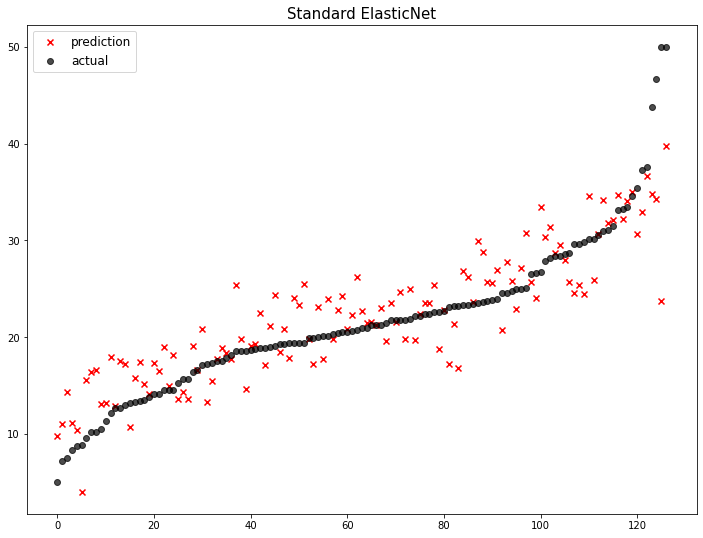

                 model        mse
0  Standard ElasticNet  18.325391


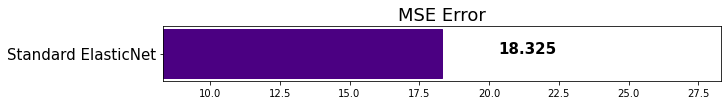

In [30]:
mse_eval('Standard ElasticNet', elasticnet_pred, y_test)

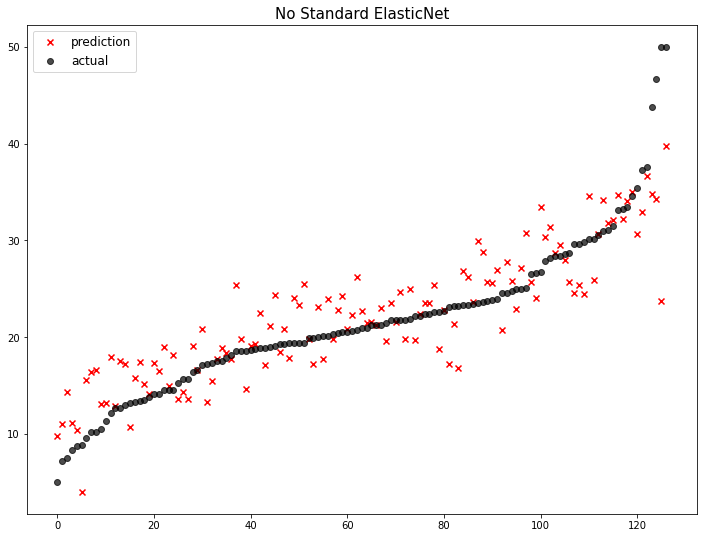

                    model        mse
0     Standard ElasticNet  18.325391
1  No Standard ElasticNet  18.325391


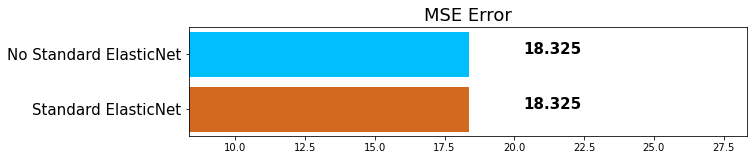

In [31]:
elasticnet_no_pipeline = ElasticNet(alpha = 0.1, l1_ratio = 0.2)
no_pipeline_pred = elasticnet_no_pipeline.fit(x_train, y_train).predict(x_test)
mse_eval('No Standard ElasticNet', elasticnet_pred, y_test)

### Polynomial Features

[document](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html?highlight=poly%20feature#sklearn.preprocessing.PolynomialFeatures)

It creates **new features** through the interaction between coefficients of polynomials

For example, suppose there are two features [a, b],

If we set degree=2, the polynomial features will be [1, a, b, a^2, ab, b^2]

In [32]:
from sklearn.preprocessing import PolynomialFeatures

In [33]:
poly = PolynomialFeatures(degree = 2, include_bias = False)

In [34]:
poly_features = poly.fit_transform(x_train)[0]

In [35]:
poly_features

array([     3.32105   ,      0.        ,     19.58      ,      1.        ,
            0.871     ,      5.403     ,    100.        ,      1.3216    ,
            5.        ,    403.        ,     14.7       ,    396.9       ,
           26.82      ,     11.0293731 ,      0.        ,     65.026159  ,
            3.32105   ,      2.89263455,     17.94363315,    332.105     ,
            4.38909968,     16.60525   ,   1338.38315   ,     48.819435  ,
         1318.124745  ,     89.070561  ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,    383.3764    ,     19.58      ,
           17.05418   ,    105.79074   ,   1958.        ,     25.876928  ,
           97.9       ,   7890.74      ,    287.826     ,   7771.302     ,
          525.1356    ,      1.        ,      0.871     ,      5.403     ,
          100.        ,  

In [36]:
x_train.iloc[0]

CRIM         3.32105
ZN           0.00000
INDUS       19.58000
CHAS         1.00000
NOX          0.87100
RM           5.40300
AGE        100.00000
DIS          1.32160
RAD          5.00000
TAX        403.00000
PTRATIO     14.70000
B          396.90000
LSTAT       26.82000
Name: 142, dtype: float64

In [37]:
poly_pipeline = make_pipeline(
    PolynomialFeatures(degree = 2, include_bias = False),
    StandardScaler(),
    ElasticNet(alpha = 0.1, l1_ratio = 0.2)
)

In [38]:
poly_pred = poly_pipeline.fit(x_train, y_train).predict(x_test)

C:\Users\boyka\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.466473201793633, tolerance: 3.4290891240105537
  model = cd_fast.enet_coordinate_descent(


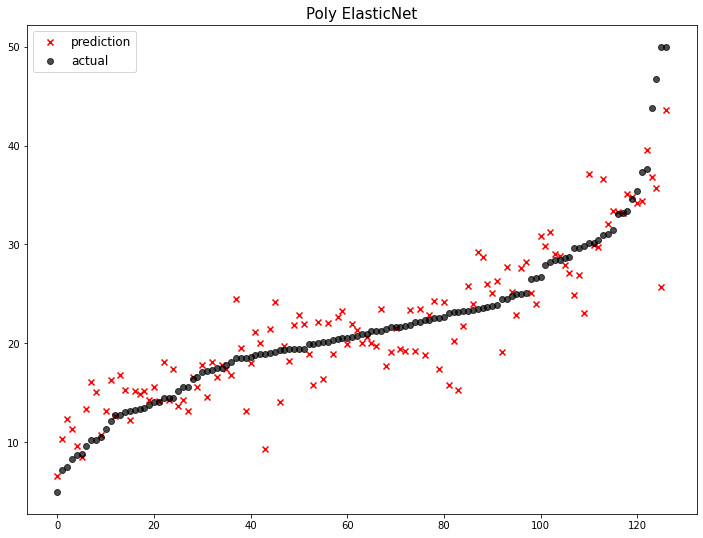

                    model        mse
0     Standard ElasticNet  18.325391
1  No Standard ElasticNet  18.325391
2         Poly ElasticNet  15.043412


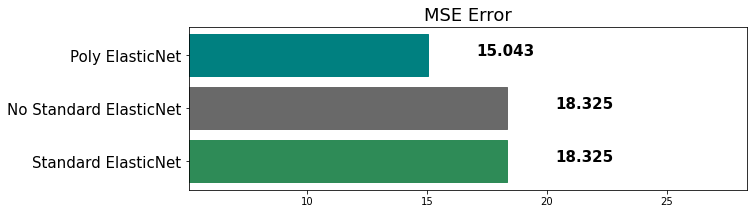

In [39]:
mse_eval('Poly ElasticNet', poly_pred, y_test)